In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../input/kc_house_data.csv')

In [3]:
data.shape

(21613, 21)

In [4]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
data['date'] = pd.to_datetime(data['date'])

In [6]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Counting houses having particular bedrooms

In [7]:
data['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

# Let's plot a bar graph for the same for better understanding

Text(0,0.5,'Count')

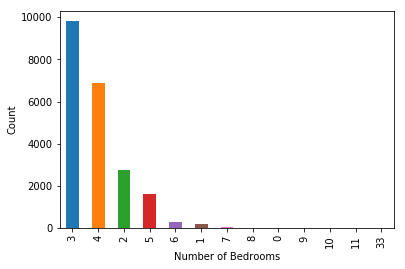

In [8]:
data['bedrooms'].value_counts().plot(kind='bar')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

In [9]:
# Houses having 3 and 4 bedrooms are sold most

# Now let us find that which factors are affecting the price of the house.

# 1. Square Feet

Text(0,0.5,'Price')

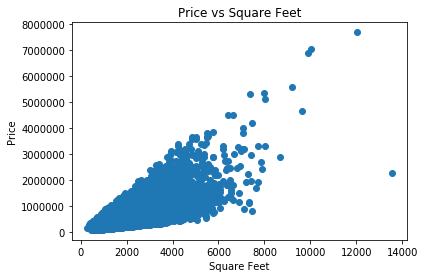

In [10]:
plt.scatter(data.sqft_living,data.price)
plt.title("Price vs Square Feet")
plt.xlabel("Square Feet")
plt.ylabel("Price")

# 2. Location of the house i.e. zipcode

Text(0,0.5,'Zip')

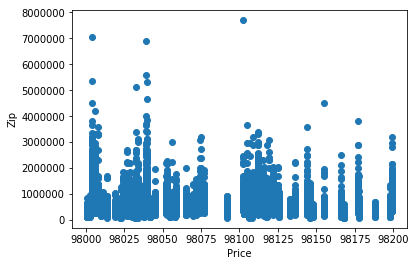

In [11]:
plt.scatter(data.zipcode, data.price)
plt.xlabel("Price")
plt.ylabel("Zip")

# Now let's see if is there any relationship between bedroom and bathroom

In [12]:
data.groupby(['bedrooms', 'bathrooms']).size()

bedrooms  bathrooms
0         0.00            7
          0.75            1
          1.00            1
          1.50            1
          2.50            3
1         0.00            3
          0.50            1
          0.75           27
          1.00          138
          1.25            2
          1.50           12
          1.75            4
          2.00            6
          2.25            4
          2.50            2
2         0.50            2
          0.75           26
          1.00         1558
          1.25            3
          1.50          294
          1.75          304
          2.00          216
          2.25          118
          2.50          197
          2.75           20
          3.00           13
          3.25            8
          3.50            1
3         0.75           16
          1.00         1780
                       ... 
7         3.00            3
          3.25            1
          3.50            5
          3.75            2


Text(0,0.5,'Bathrooms')

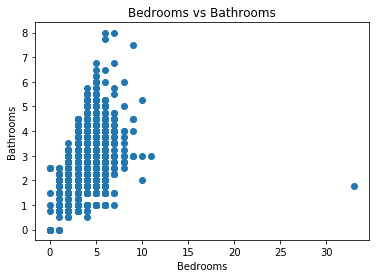

In [13]:
plt.scatter(data.bedrooms,data.bathrooms)
plt.title("Bedrooms vs Bathrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Bathrooms")

In [14]:
#Hence we concluded that bathrooms is diretly proportional to bedrooms and bedrooms to size of the house

# Now let's create a model for prediction based on linear regression

# Then we will test it's accuracy

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
reg = LinearRegression()

In [17]:
#As we want to predict Price of the house so we will set labels as the Price column

In [18]:
labels = data['price']

In [19]:
conv_dates = [1 if values == 2014 else 0 for values in data.date]
data['date'] = conv_dates
train1 = data.drop(['id','price'],axis=1)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(train1, labels,test_size = 0.2,random_state = 2)

In [22]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Testing Accuracy

In [23]:
reg.score(x_test,y_test)

0.7156405710423612

# The model that i just developed above has the accuracy of 71%